## Anomaly Detection in Time Series Sensor Data

### One-Class SVM

- The support vector machine, or SVM, algorithm developed initially for binary classification can be used for one-class classification.

- When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as One-Class SVM.

- The class provides the “nu” argument that specifies the approximate ratio of outliers in the dataset, which defaults to 0.1. In this case, we will set it to 0.01, found with a little trial and error.

CRISP - DM methodology:

- Business understanding
- Data understanding
- Data transformation
- Modeling
- Evaluation
- Deployment

### Business understanding

- The data are from sensors of water pump in one small town.

- There are 53 sensors intalled on that pump and they are actually KPIs for monitoring behaviour of the pump.

- The task is to detect unusual behaviour of the pump (failures)

- What is Time Series?

A Time Series is a sequence taken at successive equally spaced points in time. It is very important to emphasize role of time here. Observations are depending on time.

### Python Libraries

Libraries that are needed for this notebook:

- pandas - python library for working with data
- numpy - python library for different kind of calculations
- scikit-learn - python library for ML models
- matplotlib and seaborn - python libraries for visualizations

Installing libraries:

- in notebook: !pip install numpy

- in terminal: pip install numpy

Requirements:

- numpy==1.19.5
- pandas==1.1.5
- scikit-learn==0.23.1
- matplotlib==3.3.2
- seaborn==0.9.0

Checking the version of library: 
- pip freeze | grep scikit-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM

### Data understanding

We will download dataset from Kaggle: 
https://www.kaggle.com/nphantawee/pump-sensor-data

In [5]:
df = pd.read_csv("../data/sensor.csv")

In [7]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [9]:
df.shape

(220320, 55)

In [11]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

Columns:
    
- timestamp - datetime when sensor have read value
- sensor_00-51 - names of sensors
- machine_status - column that shows if machine was in normal state, in failure or in recovering

Column Unnamed is sufficient, so we will drop it

In [13]:
df.drop(columns='Unnamed: 0', inplace=True)

In [14]:
df.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23',
       'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28',
       'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33',
       'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38',
       'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43',
       'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48',
       'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [15]:
df.dtypes

timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36         float64
sensor_37   

It is important to check types of columns, especially if date is categorical value (type object), we need to cast it to date:

- df['date_column'] = pd.to_datetime(df['date_column'])

If we want to cast object value to integer or float:

- df['kolona_koju_pretvaramo'] = df['kolona_koju_pretvaramo'].astype(int)

- df['kolona_koju_pretvaramo'] = df['kolona_koju_pretvaramo'].astype(float)

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [17]:
df.dtypes

timestamp         datetime64[ns]
sensor_00                float64
sensor_01                float64
sensor_02                float64
sensor_03                float64
sensor_04                float64
sensor_05                float64
sensor_06                float64
sensor_07                float64
sensor_08                float64
sensor_09                float64
sensor_10                float64
sensor_11                float64
sensor_12                float64
sensor_13                float64
sensor_14                float64
sensor_15                float64
sensor_16                float64
sensor_17                float64
sensor_18                float64
sensor_19                float64
sensor_20                float64
sensor_21                float64
sensor_22                float64
sensor_23                float64
sensor_24                float64
sensor_25                float64
sensor_26                float64
sensor_27                float64
sensor_28                float64
sensor_29 

In [19]:
df.isnull().sum()

timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


We can see that sensor_15 doesn't have any value, so we can drop that column.

All of the other sensor have missing values, more or less. Now we will calculate percentage of missing values to see if is it worth filling it out or we should drop more columns. It is practice to drop every column that has more than 70% of missing values.


In [20]:
def calculate_na_percentage(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df)*100,
                        columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

In [21]:
calculate_na_percentage(df).head(10)

,percent
sensor_15,100.000000
sensor_50,34.956881
sensor_51,6.982117
sensor_00,4.633261
sensor_07,2.474129
sensor_08,2.317992
sensor_06,2.177741
sensor_09,2.085603
sensor_01,0.167484
sensor_30,0.118464


Percentage of missing values is low for every columns, so we will drop only column sensor_15. For the rest of the columns we need to fill missing values and we will do that with help of IterativeImputer.

IterativeImputer fills every column depending on all other columns. It can be used only for numerical columns.

In [22]:
df.drop(columns='sensor_15', inplace=True)

In [23]:
# get all the columns which missing values we want to fill in
features = df.columns
features = [feature for feature in features if feature not in ['timestamp', 'machine_status']]

In [26]:
%%time
df[features] = IterativeImputer().fit_transform(df[features])

/Users/marijamiljkovic/opt/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


CPU times: user 44min 37s, sys: 5min 37s, total: 50min 15s
Wall time: 9min 7s


In [27]:
df.isna().sum()

timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


In [28]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,2.261848,47.591444,50.867360,43.752488,590.672891,73.396496,13.346728,15.662962,15.036931,14.681360,...,35.453437,43.879539,42.656840,43.095068,48.018665,44.340863,150.890735,57.120139,209.760311,206.687502
std,0.644540,3.294353,3.666668,2.418783,144.017843,17.297522,2.397737,2.503575,2.319918,2.234783,...,10.258897,11.043730,11.575690,12.836742,15.640337,10.441807,82.240433,19.142489,68.210833,110.672834
min,-0.480434,0.000000,33.159720,31.640620,2.798032,0.000000,-0.061440,-0.765181,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,-318.281458,-345.717914
25%,2.419155,46.310760,50.390620,42.838539,626.620400,69.977213,13.317420,15.856480,15.147570,15.010130,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.002300,179.710887
50%,2.455556,48.133678,51.649300,44.227428,632.638916,75.576590,13.628470,16.167530,15.451390,15.082470,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,214.975251,199.363400
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,15.118630,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,252.849521,219.907400
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [29]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [31]:
print('Min date in dataset:', df['timestamp'].min().date())
print('Max date in dataset:', df['timestamp'].max().date())

Min date in dataset: 2018-04-01
Max date in dataset: 2018-08-31


In [22]:
train_data_minute = pd.read_csv('../data/train_data.csv')
train_data_minute['timestamp'] = pd.to_datetime(train_data_minute['timestamp'])

In [3]:
failure_df = train_data_minute[train_data_minute['machine_status']=='BROKEN'].set_index('timestamp').drop(columns='machine_status')

In [4]:
failure_df

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,...,36.979160,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.652800
2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,...,29.947916,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.738400
2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,...,31.250000,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.523100
2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,...,176.822900,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.361100
2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,...,24.739580,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,169.719892
2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,32.812500,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.768500
2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,36.458330,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,269.655985,205.729200


In [7]:
train_data_minute = train_data_minute[train_data_minute['machine_status']!='BROKEN']

In [23]:
# aggregating data on hourly level
train_data_hourly = train_data_minute.set_index('timestamp').resample('H').sum()

In [24]:
train_data = train_data_hourly

### Visualizations

In [10]:
train_data = train_data.sort_values(by='timestamp') 

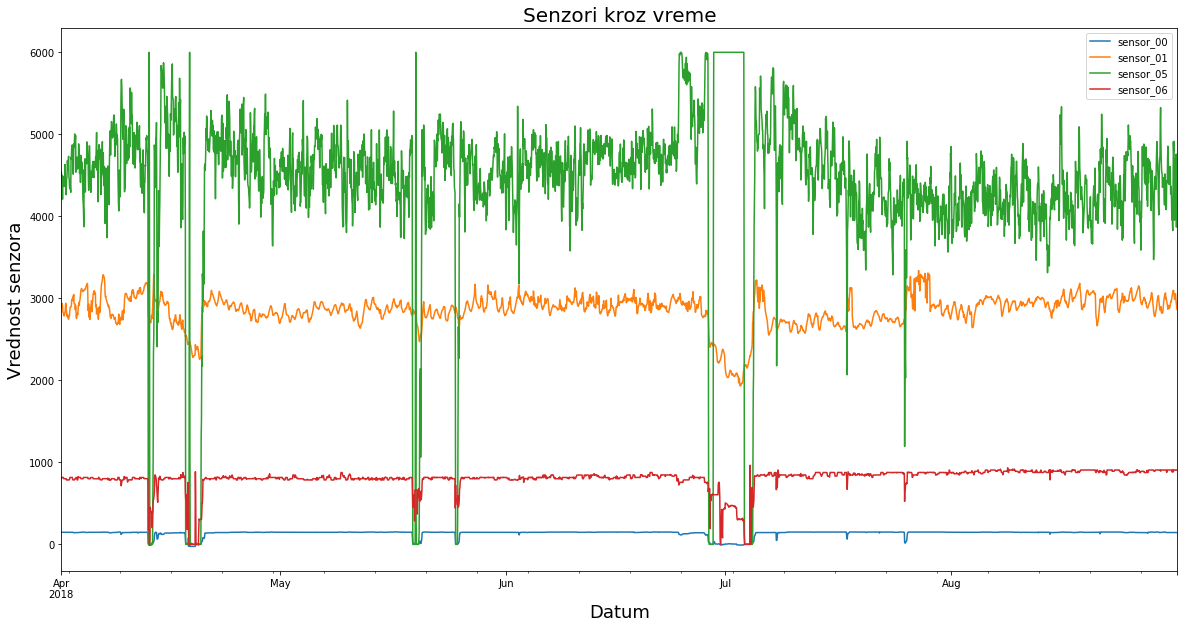

In [11]:
train_data[['sensor_00','sensor_01', 'sensor_05', 'sensor_06']].plot(figsize=(20,10))
plt.xlabel("Datum", fontsize=18)
plt.ylabel("Vrednost senzora", fontsize=18)
plt.title('Senzori kroz vreme', fontsize=20);

In [12]:
train_data_minute[train_data_minute['machine_status']=='BROKEN'].head(100)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status


In [13]:
dates_broken = train_data_minute[train_data_minute['machine_status']=='BROKEN']['timestamp']

In [14]:
train_data

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,147.270375,2913.367930,3188.541524,2773.524220,38047.224500,4544.18636,801.83005,969.72643,942.15136,905.19392,...,1926.562367,2420.312290,2326.388814,3003.18286,2827.546320,2358.796255,11847.5114,4690.10433,14409.143900,12601.8518
2018-04-01 01:00:00,147.254637,2880.946110,3186.414793,2756.119694,38054.166300,4473.95323,815.58151,969.40087,942.76623,905.54113,...,1973.176927,2392.708110,2593.171300,2839.98847,2632.523120,2358.217562,10841.1461,4403.06712,13819.734100,12224.2472
2018-04-01 02:00:00,147.217251,2939.583190,3180.642243,2735.590144,38065.624300,4501.01258,815.79850,969.64682,940.06800,905.53390,...,1936.458200,2396.353953,2533.854110,3054.10881,2906.828722,2308.738394,10416.9562,4550.92593,13518.228800,12599.8262
2018-04-01 03:00:00,147.274309,2919.270780,3178.559090,2713.107514,38005.019300,4395.38262,816.26149,969.56000,941.31948,905.49048,...,1878.906216,2377.603950,3048.900480,3224.82637,2733.506987,2300.057799,12263.3102,6278.35645,15438.946800,13360.8215
2018-04-01 04:00:00,147.227091,2899.609310,3172.091999,2707.855830,38099.189200,4208.99011,815.11132,969.08983,942.12968,905.72194,...,1858.593658,2374.739390,3398.726830,4153.64580,3554.398130,2311.921252,12785.0114,6850.69434,14948.205900,12698.4953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,144.168464,2960.329747,3059.548465,2606.076268,37942.823178,4758.57540,907.62436,1000.42690,939.75695,905.85217,...,1830.729106,2470.312300,4859.664470,3127.02544,2901.620330,2488.136550,12324.6529,5211.51618,13621.540585,11815.3938
2018-08-31 20:00:00,144.160594,2926.388752,3048.871436,2613.020685,37934.258995,3869.07452,906.19210,999.89886,940.71908,904.88286,...,1815.364555,2542.708140,3083.333320,3417.82408,3864.294010,2353.009224,17492.1876,7658.56437,18298.318742,14592.8819
2018-08-31 21:00:00,144.158628,2900.216968,3038.194470,2597.482558,37904.907204,4151.58935,906.59724,999.80480,940.45139,905.85939,...,1845.572857,2385.156040,4120.949040,4951.96755,4256.365630,3386.863210,21911.4581,6587.67377,19810.993699,13746.8169


- Conclusion based on visualization is that we can predict failure based on sensors, in this case the sensor_05 is the most valuable.

### Data preparation

Here we can have scaling, normalizing of the data, train and test spit, etc.

### Modeling

Parameters:

- nu - An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. By default 0.5 will be taken.

- tol - default=1e-3, tolerance for stopping criterion.

In [31]:
# initialize the model
ee = OneClassSVM(nu=0.01)
# train the model
model = ee.fit(train_data)

### Prediction

In [16]:
failure_df

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,...,36.979160,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.652800
2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,...,29.947916,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.738400
2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,...,31.250000,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.523100
2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,...,176.822900,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.361100
2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,...,24.739580,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,169.719892
2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,32.812500,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.768500
2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,36.458330,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,269.655985,205.729200


In [19]:
train_data[:10]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,147.270375,2913.36793,3188.541524,2773.524220,38047.2245,4544.18636,801.83005,969.72643,942.15136,905.19392,...,1926.562367,2420.312290,2326.388814,3003.18286,2827.546320,2358.796255,11847.5114,4690.10433,14409.1439,12601.8518
2018-04-01 01:00:00,147.254637,2880.94611,3186.414793,2756.119694,38054.1663,4473.95323,815.58151,969.40087,942.76623,905.54113,...,1973.176927,2392.708110,2593.171300,2839.98847,2632.523120,2358.217562,10841.1461,4403.06712,13819.7341,12224.2472
2018-04-01 02:00:00,147.217251,2939.58319,3180.642243,2735.590144,38065.6243,4501.01258,815.79850,969.64682,940.06800,905.53390,...,1936.458200,2396.353953,2533.854110,3054.10881,2906.828722,2308.738394,10416.9562,4550.92593,13518.2288,12599.8262
2018-04-01 03:00:00,147.274309,2919.27078,3178.559090,2713.107514,38005.0193,4395.38262,816.26149,969.56000,941.31948,905.49048,...,1878.906216,2377.603950,3048.900480,3224.82637,2733.506987,2300.057799,12263.3102,6278.35645,15438.9468,13360.8215
2018-04-01 04:00:00,147.227091,2899.60931,3172.091999,2707.855830,38099.1892,4208.99011,815.11132,969.08983,942.12968,905.72194,...,1858.593658,2374.739390,3398.726830,4153.64580,3554.398130,2311.921252,12785.0114,6850.69434,14948.2059,12698.4953
2018-04-01 05:00:00,147.234960,2833.28988,3168.706290,2722.135312,38020.8324,4437.93084,816.17464,969.78430,941.93432,905.46882,...,1871.093703,2261.718565,3270.833370,3752.31482,2935.474510,2360.532384,11070.0232,5471.93291,13753.4726,12891.2038
2018-04-01 06:00:00,147.259553,2827.60405,3161.024050,2701.735987,38028.8189,4487.53424,816.18189,969.87109,939.64849,905.47605,...,1865.624943,2324.739425,3306.423610,3133.96991,2524.305534,2317.129587,12302.6620,5936.92139,13493.3445,12681.1338
2018-04-01 07:00:00,147.255618,2821.22390,3150.390583,2699.782904,38021.0643,4412.65618,815.17641,969.24172,939.63394,904.94072,...,1874.999876,2322.135200,3340.277750,3142.07179,2527.777791,2388.020805,14268.8080,6925.05770,15073.2060,12404.5139
2018-04-01 08:00:00,147.233974,2790.01727,3147.178787,2666.753375,38058.4487,4430.92933,801.03434,969.79152,940.69735,905.28798,...,1864.062392,2302.864422,3316.550930,3730.61341,2641.493080,2327.835605,11993.3449,6581.30765,14910.3006,12869.7916


In [17]:
# identify anomalies in the training dataset
yhat = model.predict(failure_df)

In [25]:
train_data

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,147.270375,2913.367930,3188.541524,2773.524220,38047.224500,4544.18636,801.83005,969.72643,942.15136,905.19392,...,1926.562367,2420.312290,2326.388814,3003.18286,2827.546320,2358.796255,11847.5114,4690.10433,14409.143900,12601.8518
2018-04-01 01:00:00,147.254637,2880.946110,3186.414793,2756.119694,38054.166300,4473.95323,815.58151,969.40087,942.76623,905.54113,...,1973.176927,2392.708110,2593.171300,2839.98847,2632.523120,2358.217562,10841.1461,4403.06712,13819.734100,12224.2472
2018-04-01 02:00:00,147.217251,2939.583190,3180.642243,2735.590144,38065.624300,4501.01258,815.79850,969.64682,940.06800,905.53390,...,1936.458200,2396.353953,2533.854110,3054.10881,2906.828722,2308.738394,10416.9562,4550.92593,13518.228800,12599.8262
2018-04-01 03:00:00,147.274309,2919.270780,3178.559090,2713.107514,38005.019300,4395.38262,816.26149,969.56000,941.31948,905.49048,...,1878.906216,2377.603950,3048.900480,3224.82637,2733.506987,2300.057799,12263.3102,6278.35645,15438.946800,13360.8215
2018-04-01 04:00:00,147.227091,2899.609310,3172.091999,2707.855830,38099.189200,4208.99011,815.11132,969.08983,942.12968,905.72194,...,1858.593658,2374.739390,3398.726830,4153.64580,3554.398130,2311.921252,12785.0114,6850.69434,14948.205900,12698.4953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,144.168464,2960.329747,3059.548465,2606.076268,37942.823178,4758.57540,907.62436,1000.42690,939.75695,905.85217,...,1830.729106,2470.312300,4859.664470,3127.02544,2901.620330,2488.136550,12324.6529,5211.51618,13621.540585,11815.3938
2018-08-31 20:00:00,144.160594,2926.388752,3048.871436,2613.020685,37934.258995,3869.07452,906.19210,999.89886,940.71908,904.88286,...,1815.364555,2542.708140,3083.333320,3417.82408,3864.294010,2353.009224,17492.1876,7658.56437,18298.318742,14592.8819
2018-08-31 21:00:00,144.158628,2900.216968,3038.194470,2597.482558,37904.907204,4151.58935,906.59724,999.80480,940.45139,905.85939,...,1845.572857,2385.156040,4120.949040,4951.96755,4256.365630,3386.863210,21911.4581,6587.67377,19810.993699,13746.8169


In [32]:
yhat_2 = model.predict(train_data)

### Evaluation

In [18]:
yhat

array([-1, -1, -1, -1, -1, -1, -1])

In [21]:
yhat_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
train_data['is_fraud'] = yhat_2

In [34]:
train_data['is_fraud'].value_counts()

 1    3636
-1      36
Name: is_fraud, dtype: int64